<a href="https://colab.research.google.com/github/yeseul106/UROP_Software-Fault-Prediction/blob/main/UROP_NN_KC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# csv 파일 읽어오기
KC1 = pd.read_csv('/content/drive/MyDrive/UROP/Dataset/KC1.csv', encoding='cp949', header=None)
print(KC1.shape)
KC1.head(5)

(2109, 22)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [5]:
# 입력 데이터
input_data = KC1.loc[:,:20].to_numpy()
print("input_data shape : ",input_data.shape)

input_data shape :  (2109, 21)


In [6]:
input_data[0]

array([1.1, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 2. ,
       2. , 2. , 2. , 1.2, 1.2, 1.2, 1.2, 1.4])

In [7]:
# 정답 레이블
y_label = KC1.loc[:,21].to_numpy()
print("y_label shape : ",y_label.shape)

y_label shape :  (2109,)


In [8]:
y_label[0]

False

# **Feature Selection - Correlation**

- 21번 feature이 정답 레이블이므로 21번 열과 다른 열들의 상관계수를 파악
- 대부분의 feature이 0.2를 넘기 때문에 임계값을 0.2로 설정해보기


In [9]:
correlation = KC1.corr()
corr_features = correlation.index[abs(correlation[21])>=0.2]
print(corr_features)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
            20, 21],
           dtype='int64')


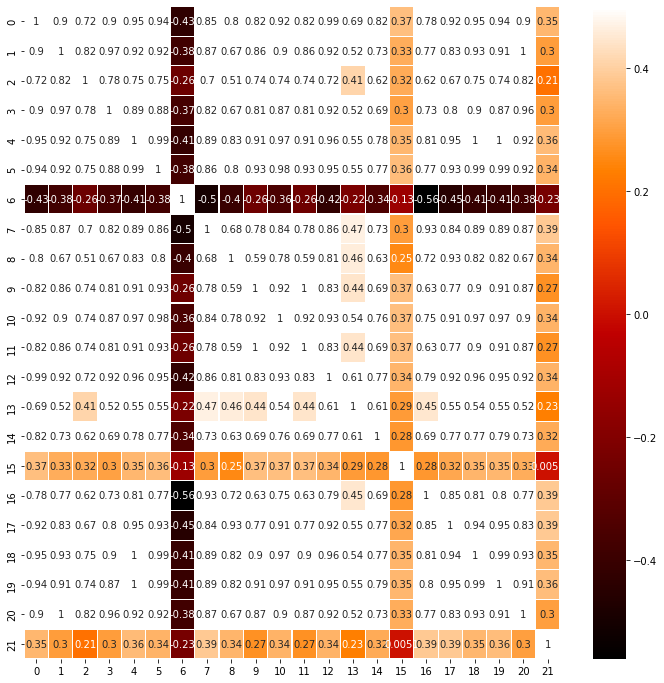

In [10]:
# 시각적으로 보기 위해 표를 이용하여 확인
import matplotlib.pyplot as plt
import seaborn as sns

#그래프 크기 결정
plt.figure(figsize=(12,12))
sns.heatmap(correlation,linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)
plt.show()

In [11]:
# 레이블 벡터화 
y_label = np.asarray(y_label).astype('float32')

In [12]:
y_label.shape

(2109,)

# **정규화 (Normalization)**

In [13]:
from sklearn import preprocessing

# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(input_data) # 데이터를 0~1 범위로 점철되게 함수 수행
data_normalized.shape

(2109, 21)

In [14]:
data_normalized[0]

array([3.48432056e-04, 9.09090909e-03, 1.60000000e-02, 9.09090909e-03,
       1.17540687e-03, 1.64165873e-04, 6.50000000e-01, 2.41860465e-02,
       6.73365793e-03, 4.00241980e-06, 4.92424242e-01, 7.20435542e-05,
       7.63358779e-03, 4.54545455e-02, 3.44827586e-02, 1.66666667e-01,
       3.24324324e-02, 1.00000000e-02, 1.76991150e-03, 2.80373832e-03,
       4.54545455e-03])

# **TrainData와 TestData의 분리**

In [15]:
from sklearn.model_selection import train_test_split

#학습셋과 테스트셋의 구분
seed=0
X_train, X_test, Y_train, Y_test = train_test_split(data_normalized,y_label, test_size =0.3, random_state = seed)

print("X_train의 shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train의 shape: (1476, 21)
X_test shape: (633, 21)
Y_train shape: (1476,)
Y_test shape: (633,)


# **모델 설계**

# **실험 2**
- epoch : 200
- optimizer : adam 함수

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(21,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(70, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

In [17]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['AUC'])

In [18]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200, batch_size=7, verbose=1)

Epoch 1/200
211/211 [==============================] - 2s 5ms/step - loss: 0.4689 - auc: 0.5407 - val_loss: 0.4270 - val_auc: 0.7254
Epoch 2/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4008 - auc: 0.6808 - val_loss: 0.4098 - val_auc: 0.7332
Epoch 3/200
211/211 [==============================] - 1s 3ms/step - loss: 0.3941 - auc: 0.7224 - val_loss: 0.4116 - val_auc: 0.7368
Epoch 4/200
211/211 [==============================] - 1s 3ms/step - loss: 0.3620 - auc: 0.7630 - val_loss: 0.4085 - val_auc: 0.7393
Epoch 5/200
211/211 [==============================] - 1s 3ms/step - loss: 0.3613 - auc: 0.7762 - val_loss: 0.4315 - val_auc: 0.7406
Epoch 6/200
211/211 [==============================] - 1s 3ms/step - loss: 0.3716 - auc: 0.7617 - val_loss: 0.4106 - val_auc: 0.7411
Epoch 7/200
211/211 [==============================] - 1s 4ms/step - loss: 0.3690 - auc: 0.7824 - val_loss: 0.4081 - val_auc: 0.7424
Epoch 8/200
211/211 [==============================] - 1s 3ms/step - 

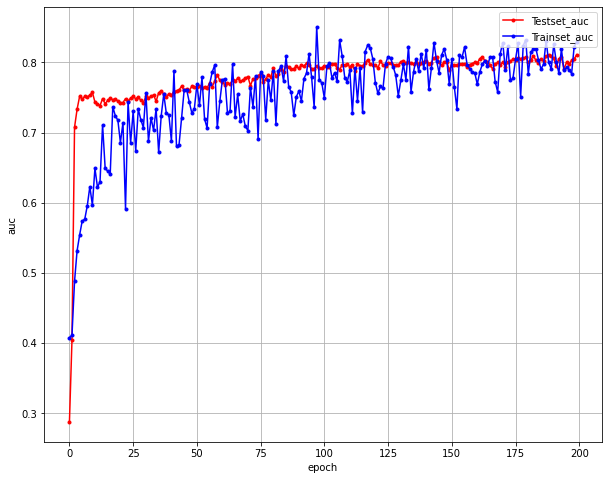

In [ ]:
#그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))

#loss 그래프
history_dict = hist.history
auc = history_dict['auc']
val_auc = history_dict['val_auc']

x_len = np.arange(len(auc))
plt.plot(x_len, val_auc, marker='.', c="red", label = "Testset_auc")
plt.plot(x_len, auc, marker='.', c="blue", label = "Trainset_auc")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('auc')
plt.show()

In [ ]:
print("\n Train AUC : %.4f" % (model.evaluate(X_train, Y_train)[1]))
print("\n Test AUC : %.4f" % (model.evaluate(X_test, Y_test)[1]))

11/11 [==============================] - 0s 2ms/step - loss: 0.2386 - auc: 0.8535

 Train AUC : 0.8535
5/5 [==============================] - 0s 4ms/step - loss: 0.4156 - auc: 0.8109

 Test AUC : 0.8109
